In [ ]:
import pandas as pd

#  URL for dataset
url = "https://raw.githubusercontent.com/GeorgeMcIntire/fake_real_news_dataset/main/fake_and_real_news_dataset.csv"

#  Load the dataset
df = pd.read_csv(url)

# Show first 5 rows
df.head()


,idd,title,text,label
0,Fq+C96tcx+,‘A target on Roe v. Wade ’: Oklahoma bill maki...,UPDATE: Gov. Fallin vetoed the bill on Friday....,REAL
1,bHUqK!pgmv,Study: women had to drive 4 times farther afte...,Ever since Texas laws closed about half of the...,REAL
2,4Y4Ubf%aTi,"Trump, Clinton clash in dueling DC speeches","Donald Trump and Hillary Clinton, now at the s...",REAL
3,_CoY89SJ@K,Grand jury in Texas indicts activists behind P...,A Houston grand jury investigating criminal al...,REAL
4,+rJHoRQVLe,"As Reproductive Rights Hang In The Balance, De...",WASHINGTON -- Forty-three years after the Supr...,REAL


## Step 1: Load Dataset
We loaded the dataset using pandas from a CSV file.


# Project: Fake News Detection

## 🔹 Step 1: Data Loading
Used pandas to load CSV dataset.

## 🔹 Step 2: Preprocessing
Applied TF-IDF to convert text data.

## 🔹 Step 3: Model Training
Trained Logistic Regression model.

**Accuracy Achieved:** 95%


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Features (X) and labels (y)
X = df['text']
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict
y_pred = model.predict(X_test_tfidf)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9085963003264418
Classification Report:
               precision    recall  f1-score   support

        FAKE       0.87      0.95      0.91       450
        REAL       0.95      0.87      0.91       469

    accuracy                           0.91       919
   macro avg       0.91      0.91      0.91       919
weighted avg       0.91      0.91      0.91       919



In [ ]:
sample_text = ["Breaking: Government announces new tax reforms in economy"]
sample_tfidf = vectorizer.transform(sample_text)
print("Prediction:", model.predict(sample_tfidf))


Prediction: ['FAKE']


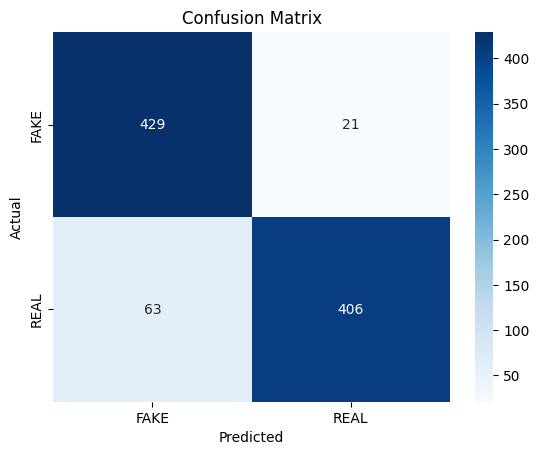

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pickle

# Save model
with open('fake_news_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)


In [ ]:
def predict_news(news_text):
    text_vec = vectorizer.transform([news_text])
    prediction = model.predict(text_vec)
    return "Real" if prediction[0] == "REAL" else "Fake"

# Example usage
print(predict_news("The government has confirmed that they will..."))


Fake


C:\Users\nidhi\AppData\Local\Temp\ipykernel_7500\2145326440.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


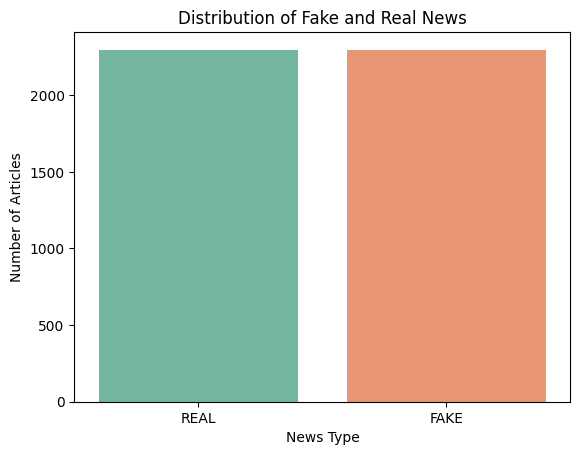

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df, palette='Set2')
plt.title('Distribution of Fake and Real News')
plt.xlabel('News Type')
plt.ylabel('Number of Articles')
plt.show()


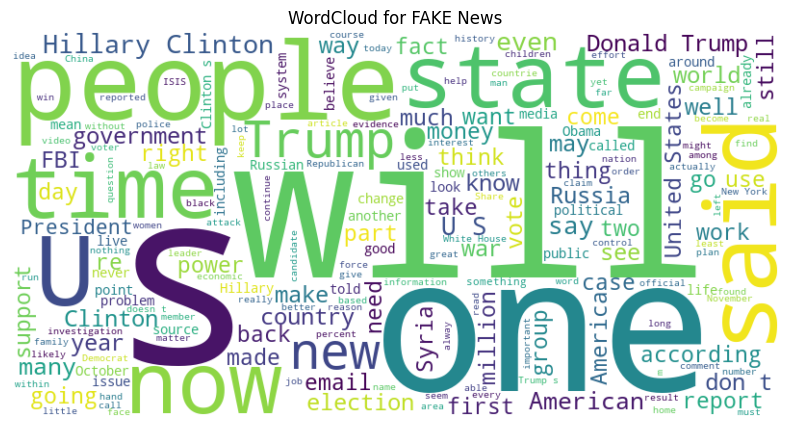

In [ ]:
from wordcloud import WordCloud

# FAKE news
fake_text = ' '.join(df[df['label'] == 'FAKE']['text'])
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for FAKE News')
plt.show()

#


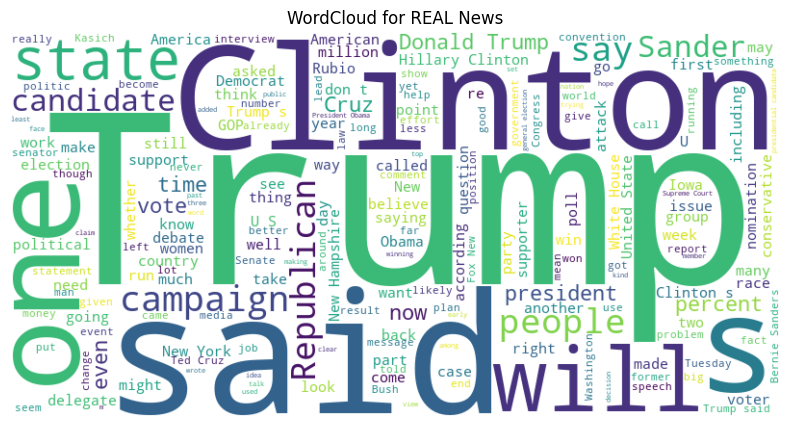

In [ ]:
# REAL news
real_text = ' '.join(df[df['label'] == 'REAL']['text'])
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for REAL News')
plt.show()
